In [28]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

plt.style.use('science')

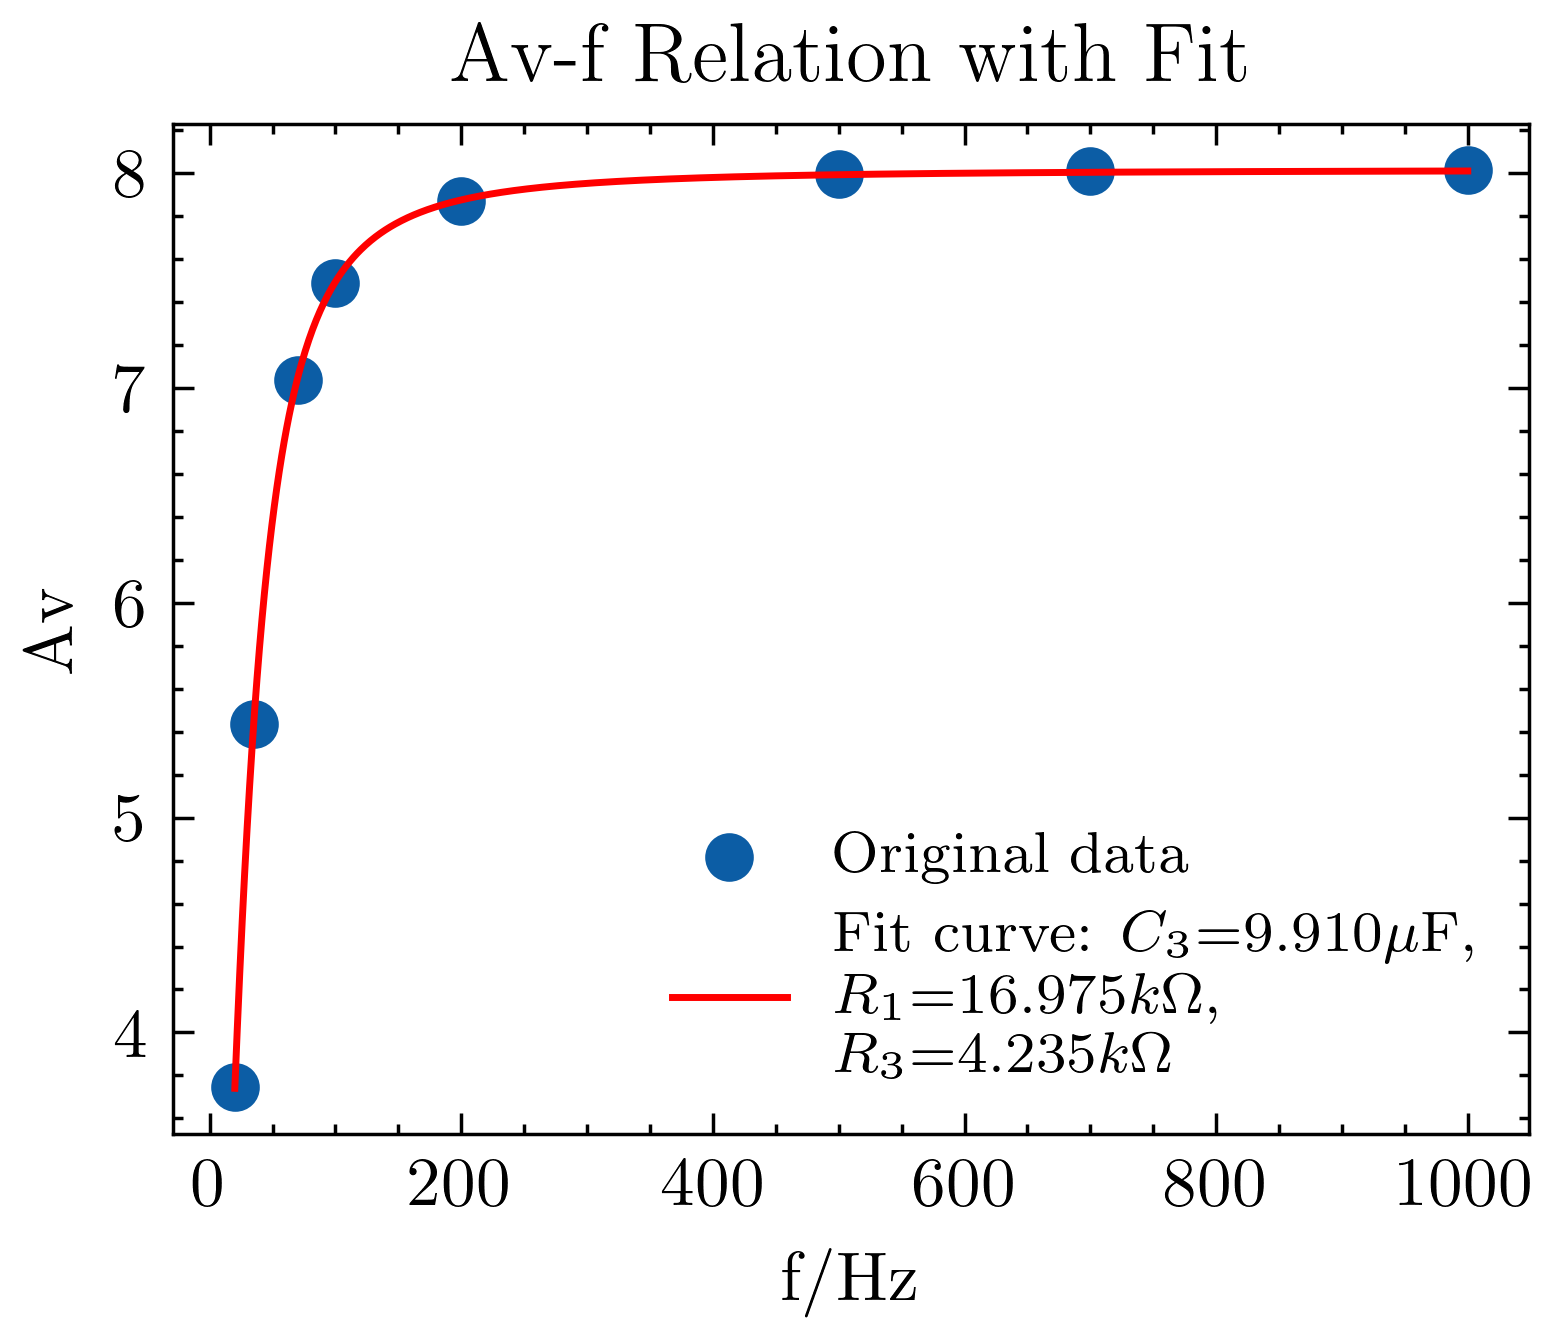

拟合参数 (p1): [9.91007997e-07 1.69754811e+04 4.23487809e+03]


In [24]:
# 输入数据
x = np.array([20, 35, 70, 100, 200, 500, 700, 1000])
y = np.array([187.4, 271.9, 351.9, 374.4, 393.6, 399.9, 400.6, 400.9]) / 50.0

# 拟合函数
def fit_func(x, c3=1e-6, r1=20e3, r3=4.7e3):
    return 4 * np.pi * x * c3 * r1 / (np.sqrt(1 + (2 * np.pi * x * c3 * r3)**2))

# 进行拟合
initial_guess = [1e-6, 20e3, 4.7e3]
popt, pcov = curve_fit(fit_func, x, y, p0=initial_guess)

# 生成拟合曲线的x值
x_fit = np.linspace(min(x), max(x), 1000)

# 计算拟合曲线的y值
y_fit = fit_func(x_fit, *popt)

# 绘制原始数据和拟合曲线
plt.figure(dpi=500)
plt.scatter(x, y, label='Original data')
plt.plot(x_fit, y_fit, 'r', label='Fit curve: $C_3$=%5.3f$\mu$F,\n $R_1$=%5.3f$k\Omega$,\n $R_3$=%5.3f$k\Omega$' % (float(popt[0]*10**7), popt[1]/1000, popt[2]/1000))
plt.xlabel('f/Hz')
plt.ylabel('Av')
plt.title('Av-f Relation with Fit')
plt.legend(fontsize='small')
plt.show()

# 输出拟合参数
print("拟合参数 (p1):", popt)

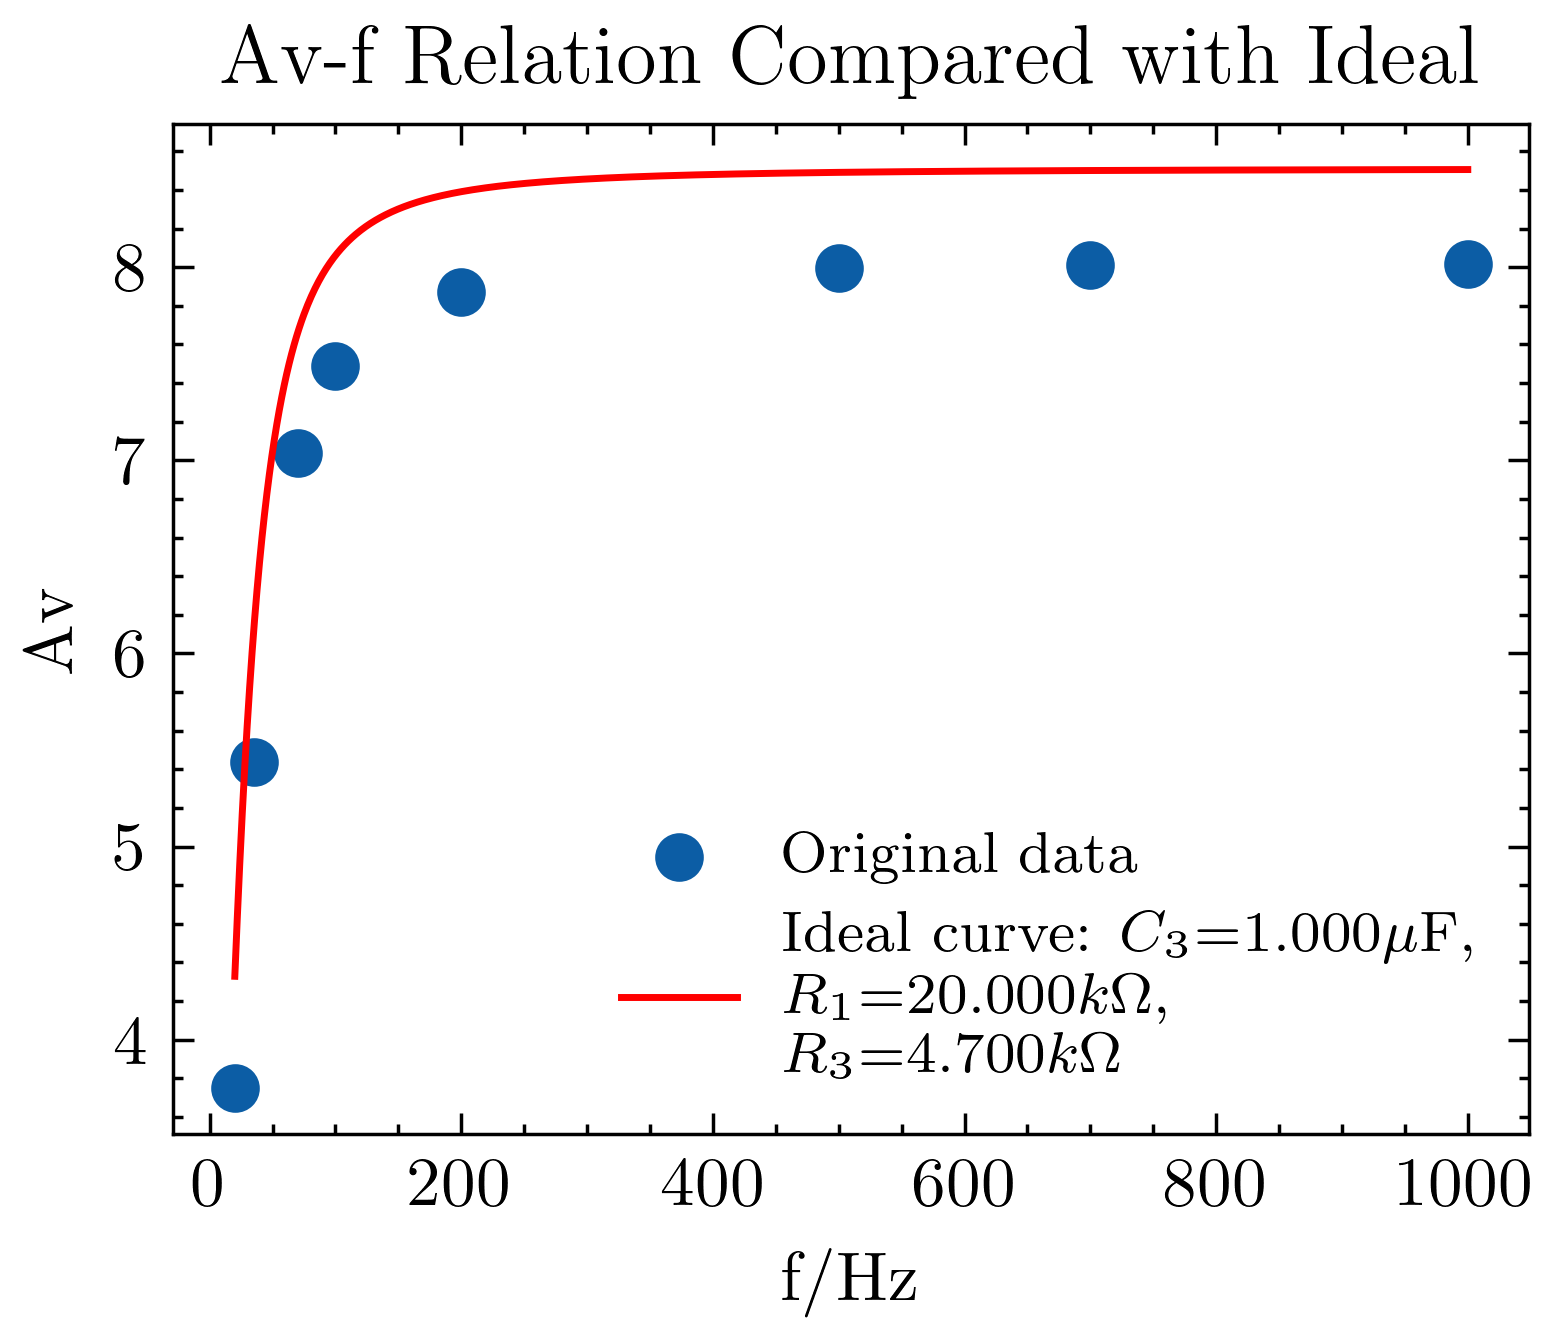

In [27]:
x_arr = np.linspace(min(x), max(x), 1000)

plt.figure(dpi=500)
plt.scatter(x, y, label='Original data')
plt.plot(x_arr, fit_func(x_arr, 1e-6, 20e3, 4.7e3), 'r', label='Ideal curve: $C_3$=%5.3f$\mu$F,\n $R_1$=%5.3f$k\Omega$,\n $R_3$=%5.3f$k\Omega$' % (1, 20, 4.7))
plt.xlabel('f/Hz')
plt.ylabel('Av')
plt.title('Av-f Relation Compared with Ideal')
plt.legend(fontsize='small')
plt.show()

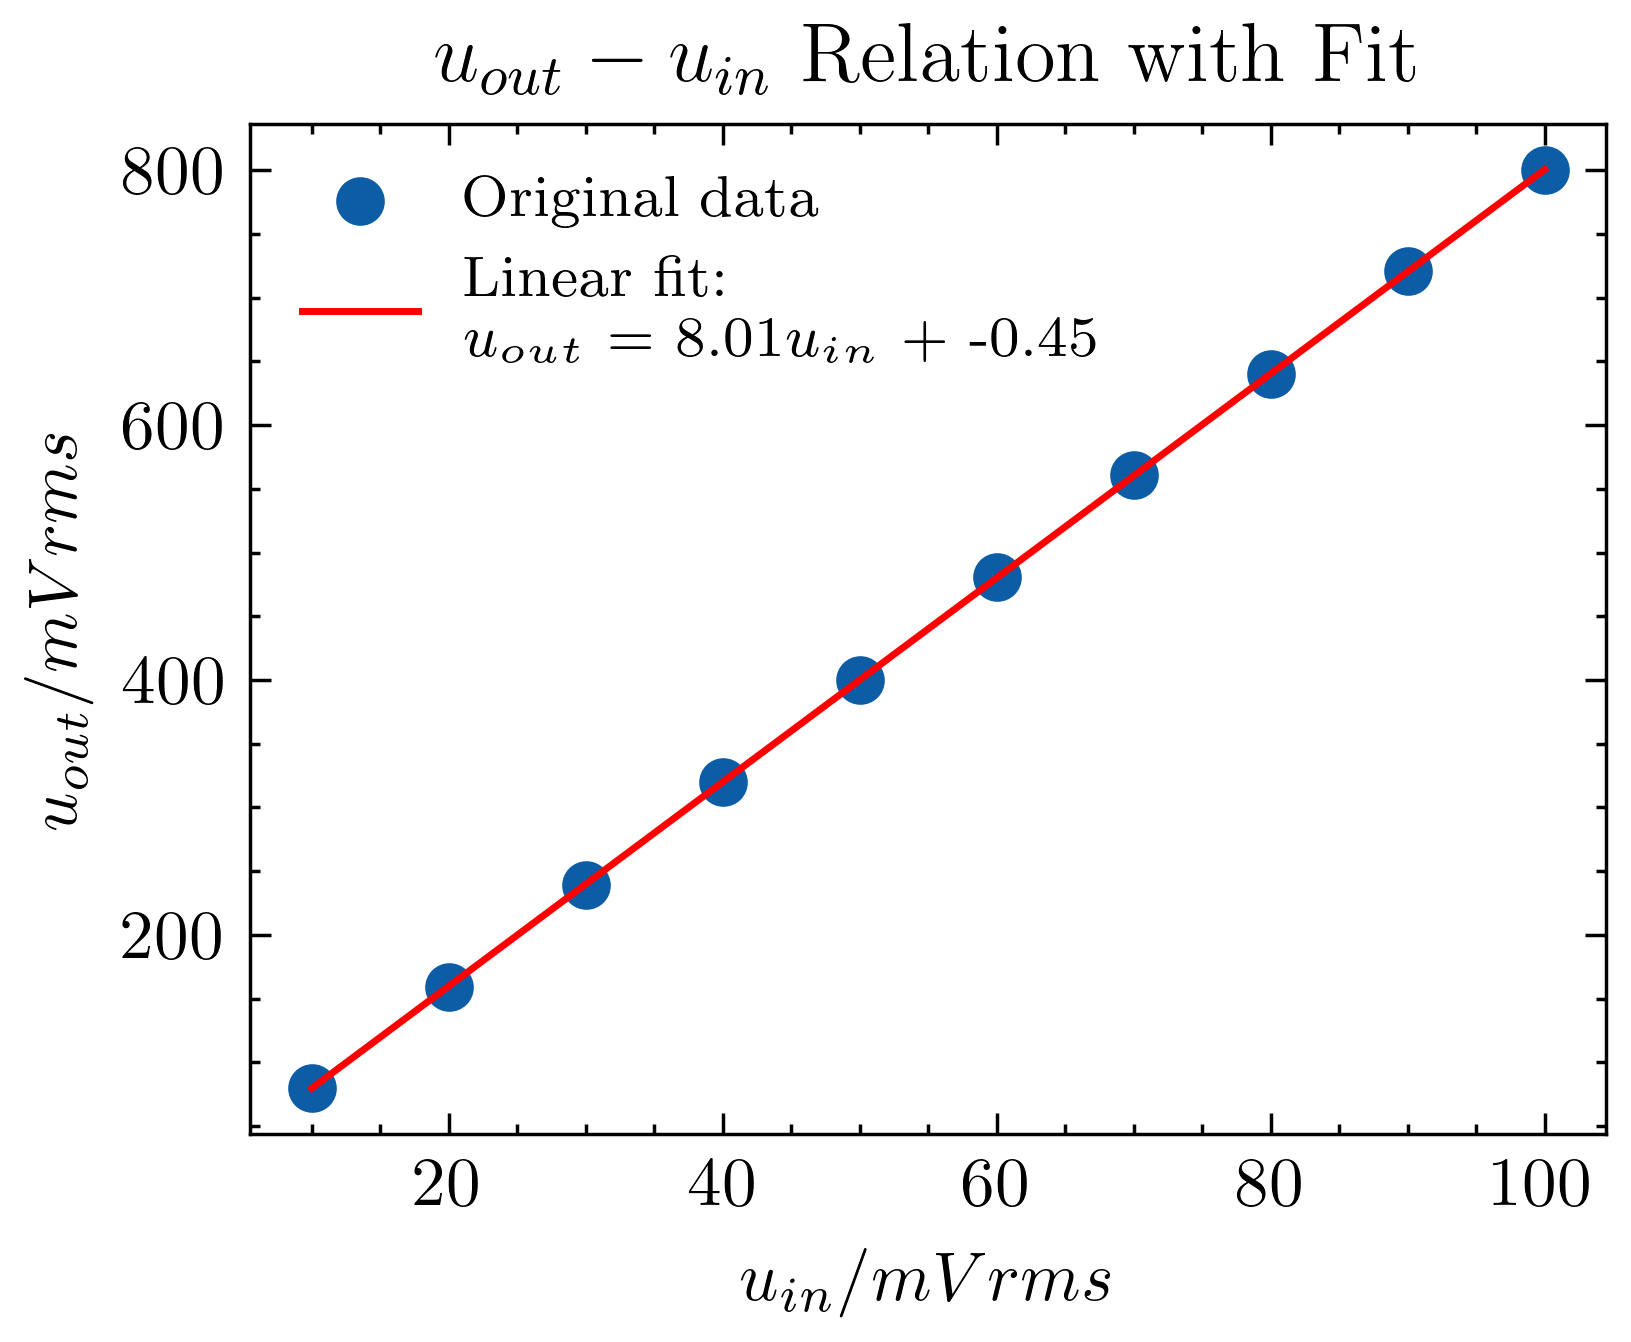

In [32]:
u_in = np.array([10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0])
u_out = np.array([80.1, 159.5, 239.1, 320.0, 400.1, 480.5, 560.5, 640.5, 720.7, 800.0])

# 进行线性回归拟合
slope, intercept, r_value, p_value, std_err = stats.linregress(u_in, u_out)

# 生成拟合曲线
x_lfit = np.linspace(min(u_in), max(u_in), 1000)
y_lfit = slope * x_lfit + intercept

# 绘制原始数据和拟合曲线
plt.figure(dpi=500)
plt.scatter(u_in, u_out, label='Original data')
plt.plot(x_lfit, y_lfit, color='red', label='Linear fit:\n $u_{out}$ = %.2f$ u_{in}$ + %.2f' % (slope, intercept))
plt.xlabel('$u_{in}/mVrms$')
plt.ylabel('$u_{out}/mVrms$')
plt.title('$u_{out}-u_{in}$ Relation with Fit')
plt.legend(fontsize='small')
plt.show()

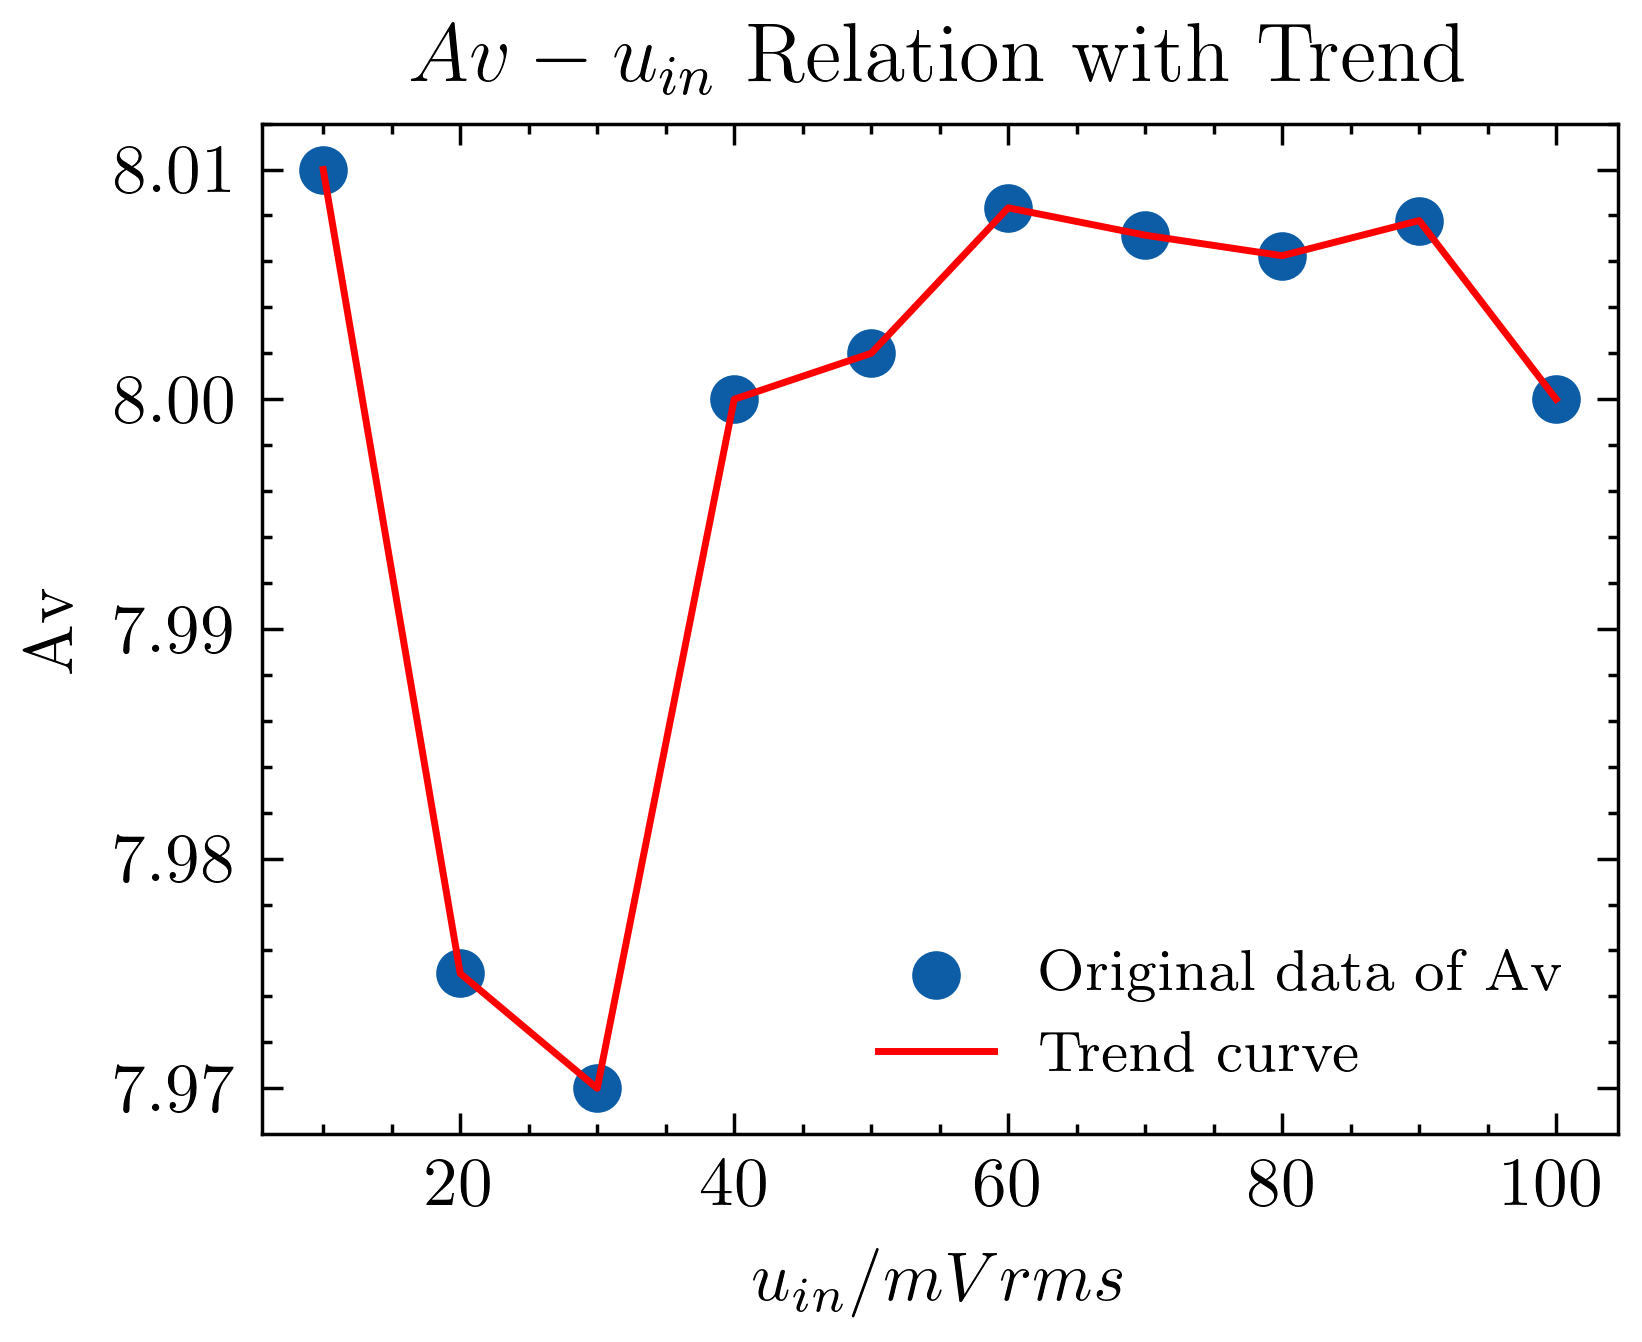

In [33]:
plt.figure(dpi=500)
plt.scatter(u_in, u_out/u_in, label='Original data of Av')
plt.plot(u_in, u_out/u_in, color='red', label='Trend curve')
plt.xlabel('$u_{in}/mVrms$')
plt.ylabel('Av')
plt.title('$Av-u_{in}$ Relation with Trend')
plt.legend(fontsize='small')
plt.show()